In [1]:
%load_ext autoreload
%autoreload 2

# Import Libraries

In [2]:
import os

from torch.utils.data import DataLoader
from transformers import AutoTokenizer

from dataset import *
from model import *
from trainer import Trainer
import json
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [3]:
PATH = r"C:\Users\krilo\PycharmProjects\HackClsTokenPlants"
MAX_LEN = 512
BATCH_SIZE = 32

train_params = {"batch_size": BATCH_SIZE,
                "shuffle": True,
                "num_workers": 4
                }

test_params = {"batch_size": BATCH_SIZE,
               "shuffle": False,
               "num_workers": 4
               }

config = {
    "num_classes": 10,
    "dropout_rate": 0.25
}

In [4]:
data = pd.read_json(f'{PATH}\json_for_bert.json')
data = data.rename(columns={'text' : 'description', 'label' : 'target'})
data = data[~data.target.isin([10])]
data.target = data.target.astype(int)

# Loading data

In [5]:
train_data = data.iloc[:int(len(data)*0.8)]
test_data = data.iloc[int(len(data)*0.8):].reset_index(drop=True)
train_data

,description,target
0,Травянистый многолетник высотой 50-150 (250) с...,1
1,"боковыемчатые, нередко сердцевидно-стреловидны...",1
2,с 2-3 наружными узко- линейными листочками обе...,1
3,вгусте; плоды в июле-сентябре. | созревают | Н...,1
4,"loides (Somm. et Levier) M.Pimen., Jakhont., E...",1
...,...,...
5601,Качество сырья нормируется Государ- ственной ф...,5
5602,Биологически ак- тивные вещества спорыньи оказ...,6
5603,зивные свойства. Бромпроизводные некоторых алк...,6
5604,В настоящее время в мире выпускается более 30 ...,7


# Train Test split

In [6]:
train_split, val_split = train_test_split(train_data, train_frac=0.85)

# Loading tokenizer from pretrained

In [7]:
tokenizer = AutoTokenizer.from_pretrained(
'cointegrated/rubert-tiny', truncation=True, do_lower_case=True)

# Creating datasets and dataloaders

In [8]:
train_dataset = CustomDataset(train_split, tokenizer, MAX_LEN)
val_dataset = CustomDataset(val_split, tokenizer, MAX_LEN)
test_dataset = CustomDataset(test_data, tokenizer, MAX_LEN)

train_dataloader = DataLoader(train_dataset, **train_params)
val_dataloader = DataLoader(val_dataset, **test_params)
test_dataloader = DataLoader(test_dataset, **test_params)

# Loading pretrained model from Huggingface

In [9]:
model = TinyRUBertForClassification(
    'cointegrated/rubert-tiny',
    config=config
)

Some weights of the model checkpoint at cointegrated/rubert-tiny were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Creating Trainer object and fitting the model

In [10]:
trainer_config = {
    "lr": 1e-4,
    "n_epochs": 1,
    "weight_decay": 0.01,
    "batch_size": BATCH_SIZE,
    "device": "cuda" if torch.cuda.is_available() else "cpu"
}
t = Trainer(trainer_config)
t.fit(
    model,
    train_dataloader,
    val_dataloader
)

Epoch 1/1


  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

0.17214396595954895
0   0.17214396595954895


  0%|          | 0/20 [00:00<?, ?it/s]

0.1752738654613495
1   0.1752738654613495


  0%|          | 0/20 [00:00<?, ?it/s]

0.17683881521224976
2   0.17683881521224976


  0%|          | 0/20 [00:00<?, ?it/s]

0.17683881521224976
3   0.17683881521224976


  0%|          | 0/20 [00:00<?, ?it/s]

0.18309858441352844
4   0.18309858441352844


  0%|          | 0/20 [00:00<?, ?it/s]

0.18935836851596832
5   0.18935836851596832


  0%|          | 0/20 [00:00<?, ?it/s]

0.19874803721904755
6   0.19874803721904755


  0%|          | 0/20 [00:00<?, ?it/s]

0.22378715872764587
7   0.22378715872764587


  0%|          | 0/20 [00:00<?, ?it/s]

0.2550860643386841
8   0.2550860643386841


  0%|          | 0/20 [00:00<?, ?it/s]

0.2957746386528015
9   0.2957746386528015


  0%|          | 0/20 [00:00<?, ?it/s]

0.3442879319190979
10   0.3442879319190979


  0%|          | 0/20 [00:00<?, ?it/s]

0.36776211857795715
11   0.36776211857795715


  0%|          | 0/20 [00:00<?, ?it/s]

0.40062597393989563
12   0.40062597393989563


  0%|          | 0/20 [00:00<?, ?it/s]

0.41627541184425354
13   0.41627541184425354


  0%|          | 0/20 [00:00<?, ?it/s]

0.44600939750671387
14   0.44600939750671387


  0%|          | 0/20 [00:00<?, ?it/s]

0.46948355436325073
15   0.46948355436325073


  0%|          | 0/20 [00:00<?, ?it/s]

0.4866979718208313
16   0.4866979718208313


  0%|          | 0/20 [00:00<?, ?it/s]

0.5211267471313477
17   0.5211267471313477


  0%|          | 0/20 [00:00<?, ?it/s]

0.5414710640907288
18   0.5414710640907288


  0%|          | 0/20 [00:00<?, ?it/s]

0.5524256825447083
19   0.5524256825447083


  0%|          | 0/20 [00:00<?, ?it/s]

0.5680751204490662
20   0.5680751204490662


  0%|          | 0/20 [00:00<?, ?it/s]

0.5758998394012451
21   0.5758998394012451


  0%|          | 0/20 [00:00<?, ?it/s]

0.5837245583534241
22   0.5837245583534241


  0%|          | 0/20 [00:00<?, ?it/s]

0.5899843573570251
23   0.5899843573570251


  0%|          | 0/20 [00:00<?, ?it/s]

0.6071987152099609
24   0.6071987152099609


  0%|          | 0/20 [00:00<?, ?it/s]

0.6165884137153625
25   0.6165884137153625


  0%|          | 0/20 [00:00<?, ?it/s]

0.6150234937667847
26   0.6150234937667847


  0%|          | 0/20 [00:00<?, ?it/s]

0.6228482127189636
27   0.6228482127189636


  0%|          | 0/20 [00:00<?, ?it/s]

0.627543032169342
28   0.627543032169342


  0%|          | 0/20 [00:00<?, ?it/s]

0.6228482127189636
29   0.6228482127189636


  0%|          | 0/20 [00:00<?, ?it/s]

0.627543032169342
30   0.627543032169342


  0%|          | 0/20 [00:00<?, ?it/s]

0.6291079521179199
31   0.6291079521179199


  0%|          | 0/20 [00:00<?, ?it/s]

0.6416275501251221
32   0.6416275501251221


  0%|          | 0/20 [00:00<?, ?it/s]

0.6416275501251221
33   0.6416275501251221


  0%|          | 0/20 [00:00<?, ?it/s]

0.6431924700737
34   0.6431924700737


  0%|          | 0/20 [00:00<?, ?it/s]

0.6510171890258789
35   0.6510171890258789


  0%|          | 0/20 [00:00<?, ?it/s]

0.6557120680809021
36   0.6557120680809021


  0%|          | 0/20 [00:00<?, ?it/s]

0.6588419079780579
37   0.6588419079780579


  0%|          | 0/20 [00:00<?, ?it/s]

0.6651017069816589
38   0.6651017069816589


  0%|          | 0/20 [00:00<?, ?it/s]

0.6682316064834595
39   0.6682316064834595


  0%|          | 0/20 [00:00<?, ?it/s]

0.6729264259338379
40   0.6729264259338379


  0%|          | 0/20 [00:00<?, ?it/s]

0.6744914054870605
41   0.6744914054870605


  0%|          | 0/20 [00:00<?, ?it/s]

0.6823161244392395
42   0.6823161244392395


  0%|          | 0/20 [00:00<?, ?it/s]

0.6885758638381958
43   0.6885758638381958


  0%|          | 0/20 [00:00<?, ?it/s]

0.6917057633399963
44   0.6917057633399963


  0%|          | 0/20 [00:00<?, ?it/s]

0.6948356628417969
45   0.6948356628417969


  0%|          | 0/20 [00:00<?, ?it/s]

0.6995304822921753
46   0.6995304822921753


  0%|          | 0/20 [00:00<?, ?it/s]

0.7042253613471985
47   0.7042253613471985


  0%|          | 0/20 [00:00<?, ?it/s]

0.707355260848999
48   0.707355260848999


  0%|          | 0/20 [00:00<?, ?it/s]

0.7089201807975769
49   0.7089201807975769


  0%|          | 0/20 [00:00<?, ?it/s]

0.7089201807975769
50   0.7089201807975769


  0%|          | 0/20 [00:00<?, ?it/s]

0.7057902812957764
51   0.7057902812957764


  0%|          | 0/20 [00:00<?, ?it/s]

0.7042253613471985
52   0.7042253613471985


  0%|          | 0/20 [00:00<?, ?it/s]

0.7057902812957764
53   0.7057902812957764


  0%|          | 0/20 [00:00<?, ?it/s]

0.701095461845398
54   0.701095461845398


  0%|          | 0/20 [00:00<?, ?it/s]

0.701095461845398
55   0.701095461845398


  0%|          | 0/20 [00:00<?, ?it/s]

0.707355260848999
56   0.707355260848999


  0%|          | 0/20 [00:00<?, ?it/s]

0.7167448997497559
57   0.7167448997497559


  0%|          | 0/20 [00:00<?, ?it/s]

0.715179979801178
58   0.715179979801178


  0%|          | 0/20 [00:00<?, ?it/s]

0.7136150002479553
59   0.7136150002479553


  0%|          | 0/20 [00:00<?, ?it/s]

0.7136150002479553
60   0.7136150002479553


  0%|          | 0/20 [00:00<?, ?it/s]

0.7136150002479553
61   0.7136150002479553


  0%|          | 0/20 [00:00<?, ?it/s]

0.7136150002479553
62   0.7136150002479553


  0%|          | 0/20 [00:00<?, ?it/s]

0.7042253613471985
63   0.7042253613471985


  0%|          | 0/20 [00:00<?, ?it/s]

0.7042253613471985
64   0.7042253613471985


  0%|          | 0/20 [00:00<?, ?it/s]

0.7026603817939758
65   0.7026603817939758


  0%|          | 0/20 [00:00<?, ?it/s]

0.6995304822921753
66   0.6995304822921753


  0%|          | 0/20 [00:00<?, ?it/s]

0.7089201807975769
67   0.7089201807975769


  0%|          | 0/20 [00:00<?, ?it/s]

0.7089201807975769
68   0.7089201807975769


  0%|          | 0/20 [00:00<?, ?it/s]

0.7104851007461548
69   0.7104851007461548


  0%|          | 0/20 [00:00<?, ?it/s]

0.715179979801178
70   0.715179979801178


  0%|          | 0/20 [00:00<?, ?it/s]

0.7198747992515564
71   0.7198747992515564


  0%|          | 0/20 [00:00<?, ?it/s]

0.7245696187019348
72   0.7245696187019348


  0%|          | 0/20 [00:00<?, ?it/s]

0.7323943376541138
73   0.7323943376541138


  0%|          | 0/20 [00:00<?, ?it/s]

0.7323943376541138
74   0.7323943376541138


  0%|          | 0/20 [00:00<?, ?it/s]

0.7323943376541138
75   0.7323943376541138


  0%|          | 0/20 [00:00<?, ?it/s]

0.7308294177055359
76   0.7308294177055359


  0%|          | 0/20 [00:00<?, ?it/s]

0.7261345982551575
77   0.7261345982551575


  0%|          | 0/20 [00:00<?, ?it/s]

0.7308294177055359
78   0.7308294177055359


  0%|          | 0/20 [00:00<?, ?it/s]

0.7339593172073364
79   0.7339593172073364


  0%|          | 0/20 [00:00<?, ?it/s]

0.7323943376541138
80   0.7323943376541138


  0%|          | 0/20 [00:00<?, ?it/s]

0.7308294177055359
81   0.7308294177055359


  0%|          | 0/20 [00:00<?, ?it/s]

0.7261345982551575
82   0.7261345982551575


  0%|          | 0/20 [00:00<?, ?it/s]

0.7323943376541138
83   0.7323943376541138


  0%|          | 0/20 [00:00<?, ?it/s]

0.7355242371559143
84   0.7355242371559143


  0%|          | 0/20 [00:00<?, ?it/s]

0.7402190566062927
85   0.7402190566062927


  0%|          | 0/20 [00:00<?, ?it/s]

0.7433489561080933
86   0.7433489561080933


  0%|          | 0/20 [00:00<?, ?it/s]

0.7464788556098938
87   0.7464788556098938


  0%|          | 0/20 [00:00<?, ?it/s]

0.7449139356613159
88   0.7449139356613159


  0%|          | 0/20 [00:00<?, ?it/s]

0.7402190566062927
89   0.7402190566062927


  0%|          | 0/20 [00:00<?, ?it/s]

0.7402190566062927
90   0.7402190566062927


  0%|          | 0/20 [00:00<?, ?it/s]

0.7386541366577148
91   0.7386541366577148


  0%|          | 0/20 [00:00<?, ?it/s]

0.7433489561080933
92   0.7433489561080933


  0%|          | 0/20 [00:00<?, ?it/s]

0.7464788556098938
93   0.7464788556098938


  0%|          | 0/20 [00:00<?, ?it/s]

0.7543035745620728
94   0.7543035745620728


  0%|          | 0/20 [00:00<?, ?it/s]

0.7511736750602722
95   0.7511736750602722


  0%|          | 0/20 [00:00<?, ?it/s]

0.7511736750602722
96   0.7511736750602722


  0%|          | 0/20 [00:00<?, ?it/s]

0.7511736750602722
97   0.7511736750602722


  0%|          | 0/20 [00:00<?, ?it/s]

0.7511736750602722
98   0.7511736750602722


  0%|          | 0/20 [00:00<?, ?it/s]

0.7464788556098938
99   0.7464788556098938


  0%|          | 0/20 [00:00<?, ?it/s]

0.7449139356613159
100   0.7449139356613159


  0%|          | 0/20 [00:00<?, ?it/s]

0.7417840361595154
101   0.7417840361595154


  0%|          | 0/20 [00:00<?, ?it/s]

0.7417840361595154
102   0.7417840361595154


  0%|          | 0/20 [00:00<?, ?it/s]

0.7355242371559143
103   0.7355242371559143


  0%|          | 0/20 [00:00<?, ?it/s]

0.737089216709137
104   0.737089216709137


  0%|          | 0/20 [00:00<?, ?it/s]

0.7449139356613159
105   0.7449139356613159


  0%|          | 0/20 [00:00<?, ?it/s]

0.7480438351631165
106   0.7480438351631165


  0%|          | 0/20 [00:00<?, ?it/s]

0.7543035745620728
107   0.7543035745620728


  0%|          | 0/20 [00:00<?, ?it/s]

0.7574334740638733
108   0.7574334740638733


  0%|          | 0/20 [00:00<?, ?it/s]

0.758998453617096
109   0.758998453617096


  0%|          | 0/20 [00:00<?, ?it/s]

0.758998453617096
110   0.758998453617096


  0%|          | 0/20 [00:00<?, ?it/s]

0.7636932730674744
111   0.7636932730674744


  0%|          | 0/20 [00:00<?, ?it/s]

0.7636932730674744


TinyRUBertForClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(29564, 312, padding_idx=0)
      (position_embeddings): Embedding(512, 312)
      (token_type_embeddings): Embedding(2, 312)
      (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-2): 3 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=312, out_features=312, bias=True)
              (key): Linear(in_features=312, out_features=312, bias=True)
              (value): Linear(in_features=312, out_features=312, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=312, out_features=312, bias=True)
              (LayerNorm): LayerNorm((312,), eps=1e-12, ele

# Save model

In [11]:
t.save("baseline_model.ckpt")

# Load pretrained Model

In [13]:
t = Trainer.load("baseline_model.ckpt")

Some weights of the model checkpoint at cointegrated/rubert-tiny were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Get train set predictions

In [25]:
train_dataset = CustomDataset(train_split, tokenizer, MAX_LEN)
train_dataloader = DataLoader(train_dataset, **test_params)

In [26]:
predictions = [i.detach().cpu().numpy().argmax() for i in t.predict(train_dataloader)]
train_split['pred'] = predictions
train_split

,description,target,pred
0,Травянистый многолетник высотой 50-150 (250) с...,1,1
1,"боковыемчатые, нередко сердцевидно-стреловидны...",1,1
2,с 2-3 наружными узко- линейными листочками обе...,1,1
3,вгусте; плоды в июле-сентябре. | созревают | Н...,1,1
4,"loides (Somm. et Levier) M.Pimen., Jakhont., E...",1,7
...,...,...,...
3578,сокий – Agrimonia procera Wallr.. Многолетник ...,0,1
3579,прямостоячие. Диплоидное число хромо- сом 2n=...,0,2
3580,"ртия), а также в Крыму. | Вне России встречает...",0,2
3581,"В Восточной Сибири (Восточ- ный Саян, Тыва, За...",0,1


In [27]:
print(classification_report(train_split.target, train_split.pred, target_names=fields))

                              precision    recall  f1-score   support

               Другие виды.        0.77      0.18      0.29       187
                  Описание.        0.83      0.91      0.87       628
                     Ареал.        0.80      0.90      0.84       328
                  Экология.        0.69      0.74      0.72       349
                   Ресурсы.        0.75      0.68      0.72       426
                     Сырьё.        0.90      0.87      0.88       140
Фармакологические свойства.        0.83      0.70      0.76       212
     Применение в медицине.        0.73      0.92      0.82       320
              Возделывание.        0.76      0.76      0.76       556
         Химический состав.        0.93      0.95      0.94       437

                    accuracy                           0.80      3583
                   macro avg       0.80      0.76      0.76      3583
                weighted avg       0.80      0.80      0.78      3583



# Get val set predictions

In [19]:
predictions = [i.detach().cpu().numpy().argmax() for i in t.predict(val_dataloader)]
val_split['pred'] = predictions
val_split

,description,target,pred
0,ристой полыни горькой. Корзинки полыни Сиверса...,1,1
1,Многолетнее травянистое растение или полукуста...,1,1
2,от одной до пяти пар хоро- шо развитых ушек. |...,1,1
3,"Сибири цветет в июле-августе, плоды созревают ...",1,1
4,Невысокое дерево или высокий ку- старник высот...,1,1
...,...,...,...
634,"и, Урала, Тобола, Ишима и Сарысу. Граница ареа...",0,2
635,ие по отношению к этим двум видам. | Солодка К...,0,3
636,"ся в поймах и низовьях крупных рек, а в от- ли...",0,3
637,о в среднем составляют 10-20 т/га. Содержание ...,0,8


In [20]:
print(classification_report(val_split.target, val_split.pred, target_names=fields))

                              precision    recall  f1-score   support

               Другие виды.        0.00      0.00      0.00        34
                  Описание.        0.78      0.87      0.83       111
                     Ареал.        0.75      0.88      0.81        59
                  Экология.        0.70      0.77      0.73        62
                   Ресурсы.        0.67      0.67      0.67        76
                     Сырьё.        0.92      0.88      0.90        25
Фармакологические свойства.        0.86      0.66      0.75        38
     Применение в медицине.        0.73      0.93      0.82        57
              Возделывание.        0.74      0.67      0.70        99
         Химический состав.        0.89      0.95      0.92        78

                    accuracy                           0.76       639
                   macro avg       0.70      0.73      0.71       639
                weighted avg       0.73      0.76      0.74       639



# Get test set predictions


In [21]:
predictions = [i.detach().cpu().numpy().argmax() for i in t.predict(test_dataloader)]
test_data['pred'] = predictions
test_data

,description,target,pred
0,ри необходимости ускорения обратного разви- ти...,7,7
1,лечения паркинсонизма. Абергин стимулирует доф...,7,6
2,"авки, применяется для лечения повышенной раздр...",7,7
3,Травянистый многолетник высотой 40-110 см. Сте...,1,1
4,", шириной 0,5- 1,5 см, острозубчатые, с обеих ...",1,1
...,...,...,...
1051,Качество сырья нормируется Временной фармакопе...,5,5
1052,Извлечения из травы якорцев стелющихся обладаю...,6,6
1053,Из травы якорцев стелю- щихся был получен преп...,7,7
1054,жением сосудов нижних конечностей. После лечен...,7,7


In [22]:
fields = [
          'Другие виды. ', # 0
          'Описание. ', # 1
          'Ареал. ', # 2
          'Экология. ', # 3
          'Ресурсы. ', # 4
          'Сырьё. ', # 5
          'Фармакологические свойства. ',# 6
          'Применение в медицине. ',# 7
          'Возделывание. ',# 8
          'Химический состав. '# 9
]

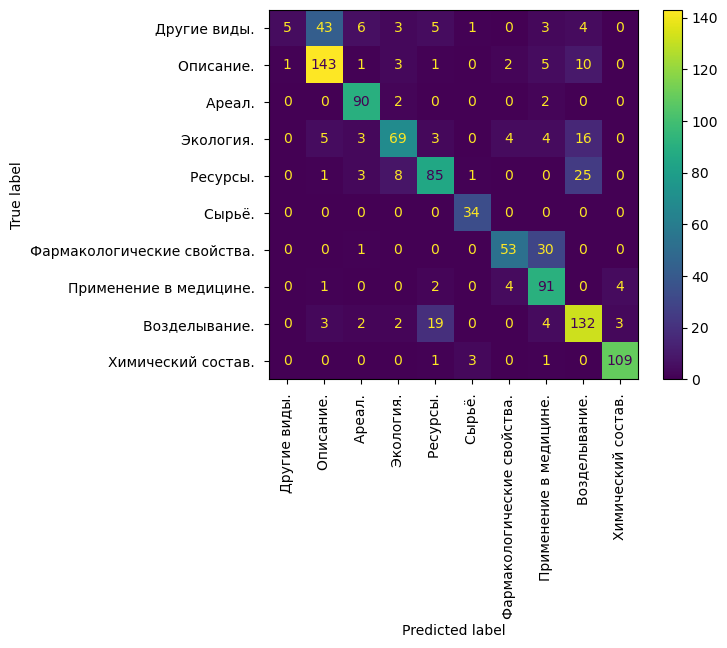

In [23]:
ConfusionMatrixDisplay.from_predictions(
   test_data.target, predictions, display_labels=fields, xticks_rotation=90)
plt.show()

In [28]:
print(classification_report(test_data.target, test_data.pred, target_names=fields))

                              precision    recall  f1-score   support

               Другие виды.        0.83      0.07      0.13        70
                  Описание.        0.73      0.86      0.79       166
                     Ареал.        0.85      0.96      0.90        94
                  Экология.        0.79      0.66      0.72       104
                   Ресурсы.        0.73      0.69      0.71       123
                     Сырьё.        0.87      1.00      0.93        34
Фармакологические свойства.        0.84      0.63      0.72        84
     Применение в медицине.        0.65      0.89      0.75       102
              Возделывание.        0.71      0.80      0.75       165
         Химический состав.        0.94      0.96      0.95       114

                    accuracy                           0.77      1056
                   macro avg       0.79      0.75      0.74      1056
                weighted avg       0.78      0.77      0.75      1056

